In [1]:
import os
import numpy as np
import sys
import pandas as pd
# root_folder = os.path.dirname(os.getcwd())
# sys.path.append(root_folder)
import utilities as rocku
import skimage as ski
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
###################### need to change start
ipts="33799"
###################### need to change end
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
# scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce"
# scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/pixel_binned"
# scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized"
scan_list = os.listdir(scan_loc)
sorted(scan_list, reverse=True)

['2025_03_04_sub7371',
 '2025_03_03_nGI_OB',
 '2025_03_03_align',
 '2025_03_03_TopL4_60s',
 '2025_03_03_TopL4',
 '2025_03_03_TopL3_60s',
 '2025_03_03_TopL3',
 '2025_03_03_TopL2_60s',
 '2025_03_03_TopL1_60s',
 '2025_03_03_MidL4_60s',
 '2025_03_03_MidL3_60s',
 '2025_03_03_MidL2_60s',
 '2025_03_03_MidL1_60s',
 '2025_03_03_BotL4_60s',
 '2025_03_03_BotL4',
 '2025_03_03_BotL3_60s',
 '2025_03_03_BotL3',
 '2025_03_03_BotL2_60s',
 '2025_03_03_BotL2',
 '2025_03_03_BotL1_nGI_OB',
 '2025_03_03_BotL1_60s',
 '2025_03_03_BotL1',
 '2025_02_27_nGI_OB',
 '2025_02_27_TopL4',
 '2025_02_27_TopL3',
 '2025_02_27_TopL2',
 '2025_02_27_TopL1',
 '2025_02_27_BotL4',
 '2025_02_27_BotL3',
 '2025_02_27_BotL2',
 '2025_02_27_BotL1']

In [3]:
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
# ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/pixel_binned"
# ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized"
# ob_loc = "/HFIR/CG1D/IPTS-" + ipts + "/raw/ob"
ob_list = os.listdir(ob_loc)
sorted(ob_list, reverse=True)

['2025_03_04_sub7371',
 '2025_03_03_nGI_OB',
 '2025_03_03_align',
 '2025_03_03_TopL4_60s',
 '2025_03_03_TopL4',
 '2025_03_03_TopL3_60s',
 '2025_03_03_TopL3',
 '2025_03_03_TopL2_60s',
 '2025_03_03_TopL1_60s',
 '2025_03_03_MidL4_60s',
 '2025_03_03_MidL3_60s',
 '2025_03_03_MidL2_60s',
 '2025_03_03_MidL1_60s',
 '2025_03_03_BotL4_60s',
 '2025_03_03_BotL4',
 '2025_03_03_BotL3_60s',
 '2025_03_03_BotL3',
 '2025_03_03_BotL2_60s',
 '2025_03_03_BotL2',
 '2025_03_03_BotL1_nGI_OB',
 '2025_03_03_BotL1_60s',
 '2025_03_03_BotL1',
 '2025_02_27_nGI_OB',
 '2025_02_27_TopL4',
 '2025_02_27_TopL3',
 '2025_02_27_TopL2',
 '2025_02_27_TopL1',
 '2025_02_27_BotL4',
 '2025_02_27_BotL3',
 '2025_02_27_BotL2',
 '2025_02_27_BotL1']

In [4]:
dc_loc = "/HFIR/CG1D/IPTS-" + ipts + "/raw/dc"
# dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/pixel_binned"
# dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized"
dc_list = os.listdir(dc_loc)
sorted(dc_list, reverse=True)

['2025_03_04_nGI_DC_90s_redo',
 '2025_03_04_nGI_DC_90s',
 '2025_03_04_nGI_DC_60s_redo',
 '2025_03_04_nGI_DC_60s',
 '2025_03_03_nGI_DC_90s',
 '2025_03_03_align',
 '2025_02_28_nGI_DC_90s',
 '2025_02_26_nGI_DC_60s_flipped',
 '2025_02_26_nGI_DC_60s',
 '2025_02_26_nGI_DC_30s',
 '2025_02_25_sample2_top',
 '2025_02_24_sample3_bottom',
 '2025_02_20_30s']

In [5]:
scan_name = "2025_03_03_MidL1_60s"
ob_name = "2025_03_03_BotL1_nGI_OB"
dc_name = "2025_03_04_nGI_DC_60s_redo"
#########################################
out_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/angel"
xl_save_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/notes_photos/"
#########################################
if ob_name == scan_name:
    ob_name = None
scan_dir = os.path.join(scan_loc, scan_name)
out_dir = os.path.join(out_loc, scan_name)
file_list = os.listdir(scan_dir)
file_list = sorted(file_list, reverse=False)
dc_dir = os.path.join(dc_loc, dc_name)
dc_list = os.listdir(dc_dir)
dc_list = sorted(dc_list, reverse=False)
if ob_name is None:
    ob_dir = scan_dir
else:
    ob_dir = os.path.join(ob_loc, ob_name)
    ob_list = os.listdir(ob_dir)
    ob_list = sorted(ob_list, reverse=False)

In [6]:
to_remove_list = [
]
for to_remove in to_remove_list:
    file_list.remove(to_remove)
file_list

['ACL_067_0060_0001.tiff',
 'ACL_067_0060_0002.tiff',
 'ACL_067_0060_0003.tiff',
 'ACL_067_0060_0004.tiff',
 'ACL_067_0060_0005.tiff',
 'ACL_067_0060_0006.tiff',
 'ACL_067_0060_0007.tiff',
 'ACL_067_0060_0008.tiff',
 'ACL_067_0060_0009.tiff',
 'ACL_067_0060_0010.tiff',
 'ACL_067_0060_0011.tiff',
 'ACL_067_0060_0012.tiff',
 'ACL_067_0060_0013.tiff',
 'ACL_067_0060_0014.tiff',
 'ACL_067_0060_0015.tiff',
 'ACL_067_0060_0016.tiff',
 'ACL_067_0060_0017.tiff',
 'ACL_067_0060_0018.tiff',
 'ACL_067_0060_0019.tiff',
 'ACL_067_0060_0020.tiff',
 'ACL_067_0060_0021.tiff',
 'ACL_067_0060_0022.tiff',
 'ACL_067_0060_0023.tiff',
 'ACL_067_0060_0024.tiff',
 'ACL_067_0060_0025.tiff',
 'ACL_067_0060_0026.tiff',
 'ACL_067_0060_0027.tiff',
 'ACL_067_0060_0028.tiff',
 'ACL_067_0060_0029.tiff',
 'ACL_067_0060_0030.tiff',
 'ACL_067_0060_0031.tiff',
 'ACL_067_0060_0032.tiff',
 'ACL_067_0060_0033.tiff',
 'ACL_067_0060_0034.tiff',
 'ACL_067_0060_0035.tiff',
 'ACL_067_0060_0036.tiff']

In [10]:
images_per_step = 3
len(file_list)

36

In [11]:
idx_list = []
pos_list = []
ob_first_idx = None
ob_last_idx = None
for ea in file_list:
    if 'open' not in ea:
        _split = ea.split('_')
        _str = _split[-1]
        _pos = _split[1]
#     _pos = _split[2]
        _idx = _str.split('.')[0]
        idx_list.append(int(_idx))
        pos_list.append(int(_pos))
num_of_img = max(idx_list)
pos1 = max(pos_list)
pos2 = min(pos_list)
pos1_str = 'ACL_' + "{:03d}".format(pos1)
pos2_str = 'ACL_' + "{:03d}".format(pos2)
idx_str = '_' + "{:04d}".format(1)
pos_file_list = []
for e in file_list:
    if pos1_str in e or pos2_str in e:
        if idx_str in e:
            pos_file_list.append(e)
# pos_file_list.append('20230901_ACL_95_0090_0001.tiff')
pos_file_list

['ACL_067_0060_0001.tiff']

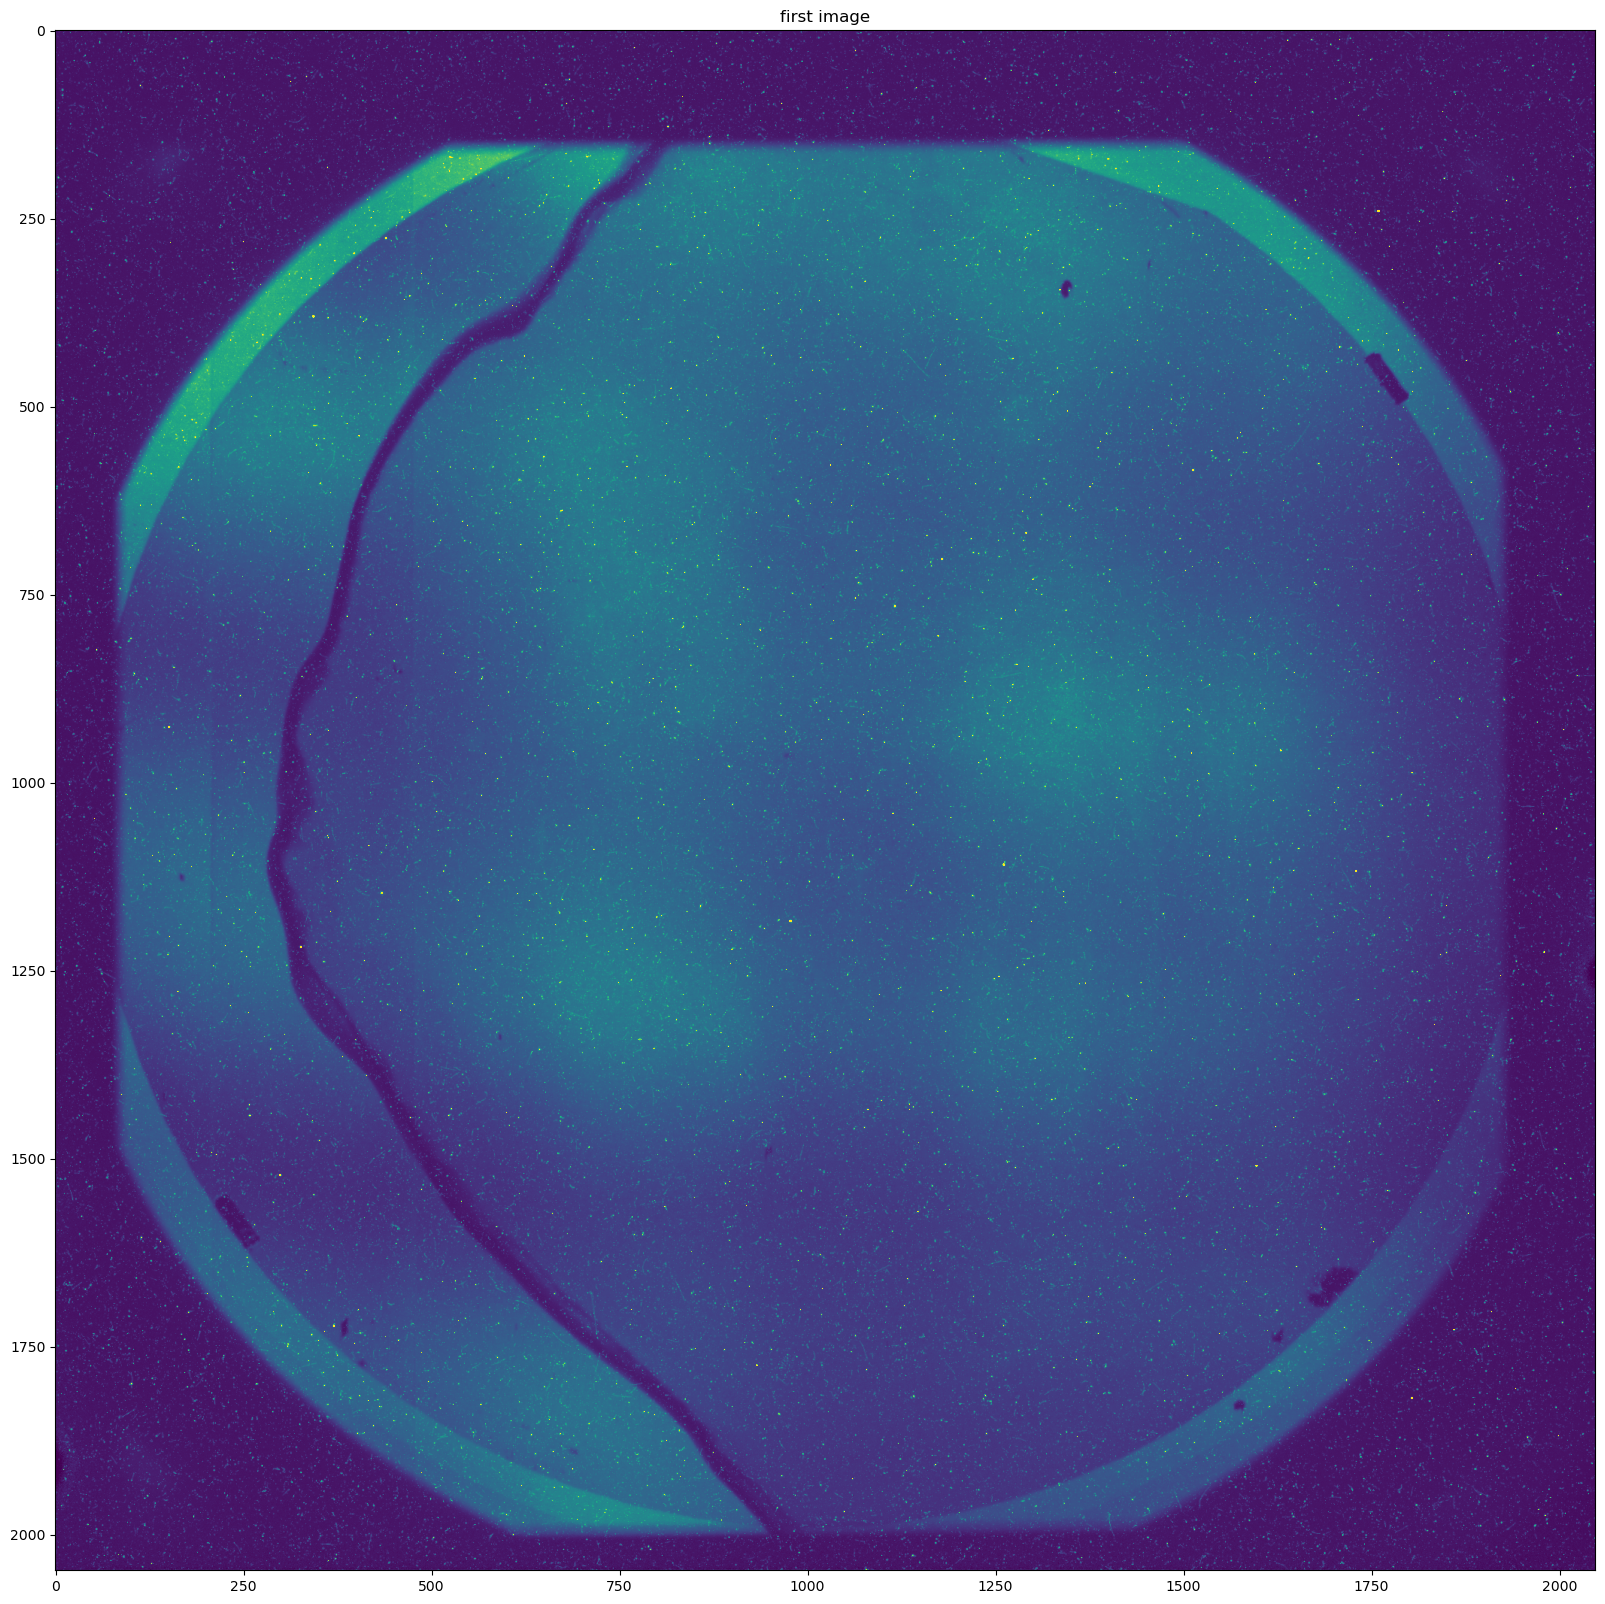

In [12]:
#############################
img_vmax = 4000
#############################
if len(pos_file_list) > 1:
    img1 = ski.io.imread(os.path.join(scan_dir, pos_file_list[0]))
    img2 = ski.io.imread(os.path.join(scan_dir, pos_file_list[1]))
    f, ax = plt.subplots(1, 2, figsize=(20, 20))
    ax[0].imshow(img1, vmax=img_vmax)
    ax[0].set_title('first image')
    
    ax[1].imshow(img2, vmax=img_vmax)
    ax[1].set_title('last image')
else:
    img1 = ski.io.imread(os.path.join(scan_dir, pos_file_list[0]))
    f, ax = plt.subplots(1, 1, figsize=(20, 20))
    ax.imshow(img1, vmax=img_vmax)
    ax.set_title('first image')

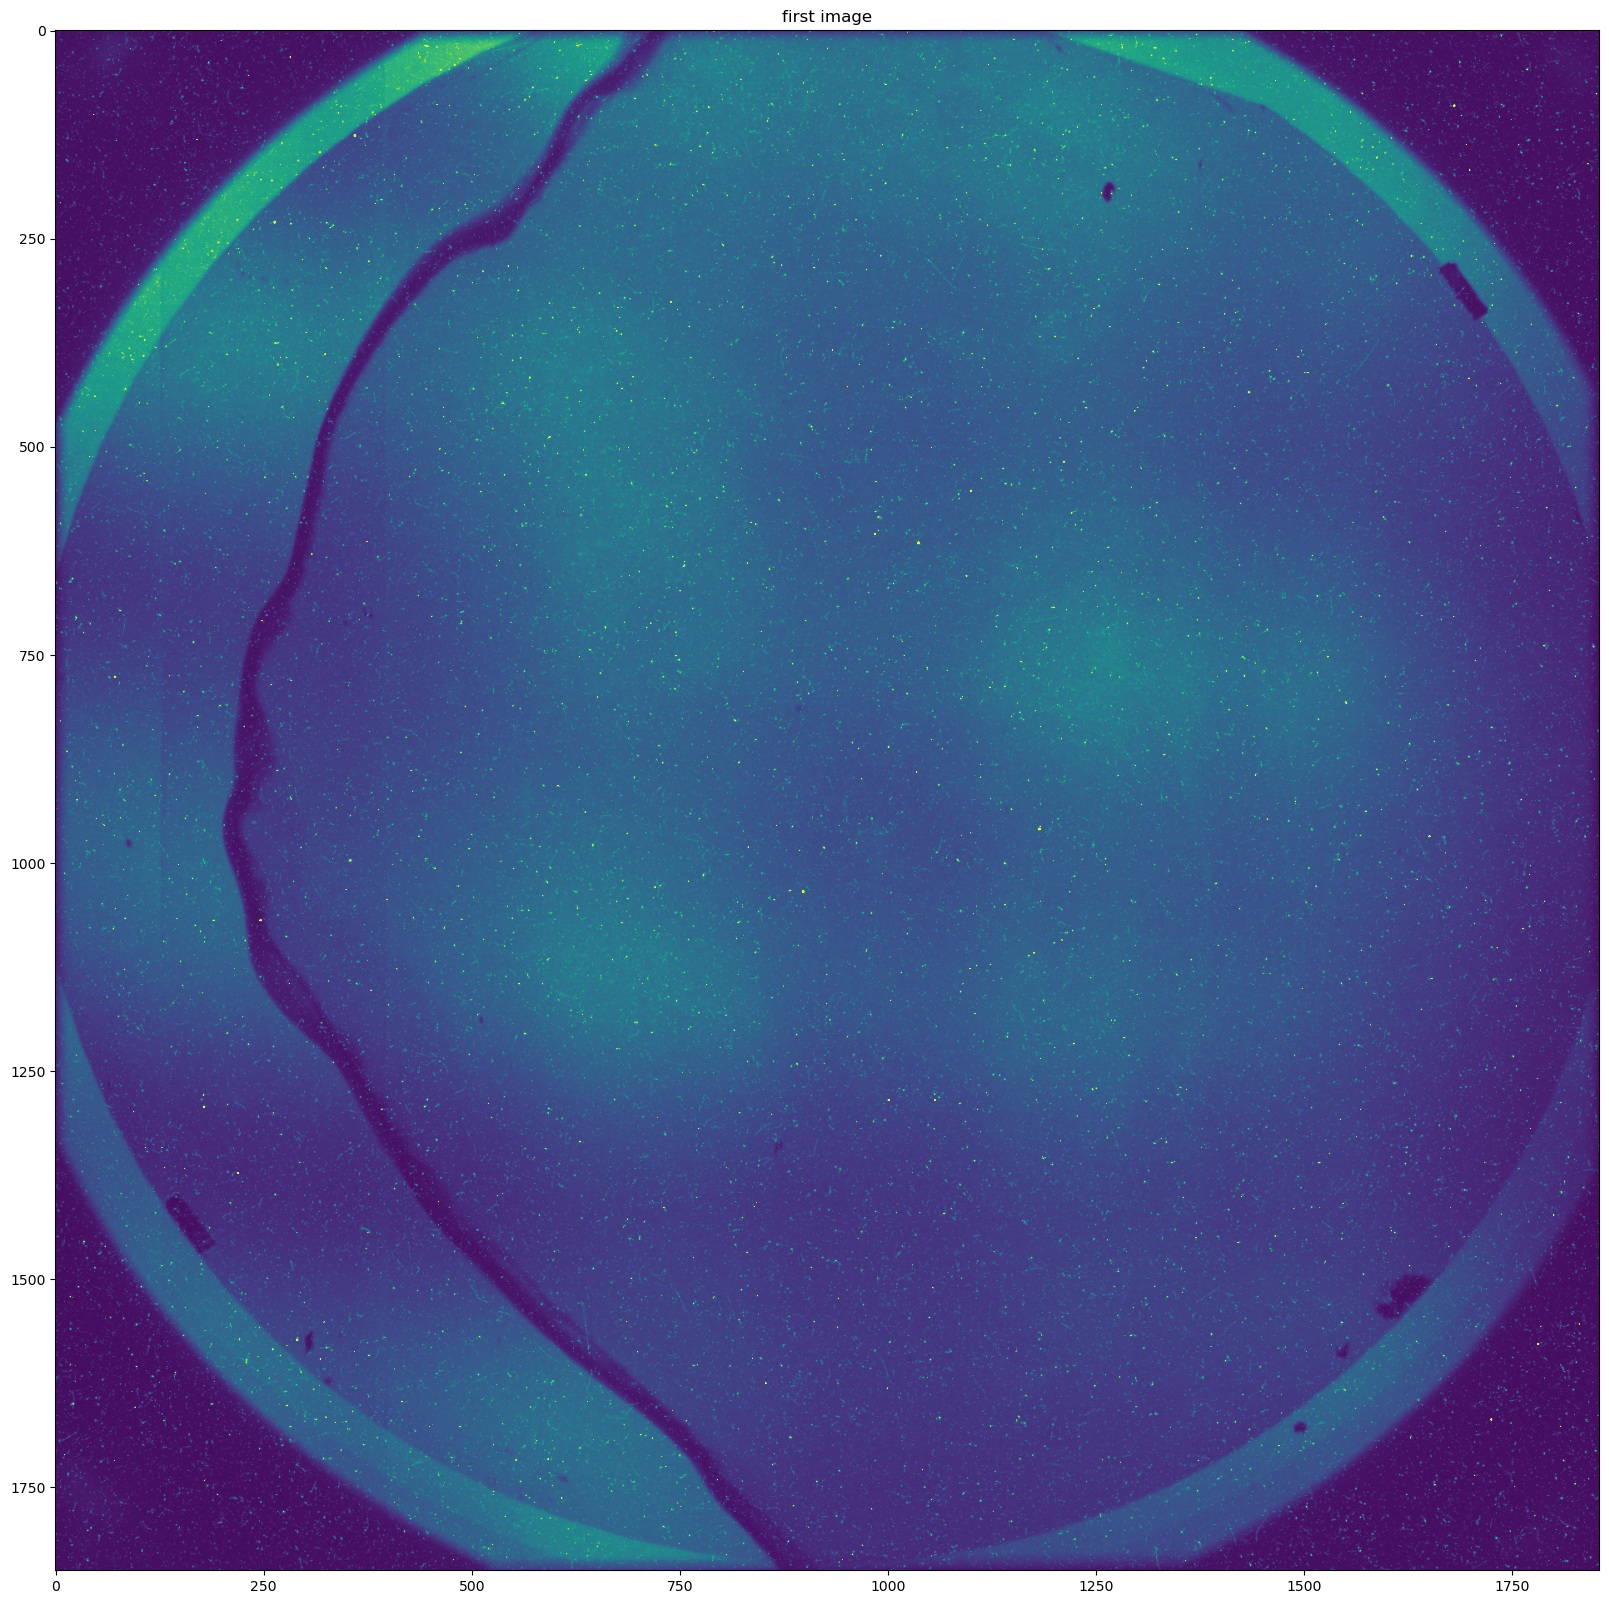

In [14]:
###################### need to change start
# crop = False
crop = True
# crop_left = 80#950#150 #205
# crop_right = 1935#5300#1960
# crop_top = 70#1000#90#90 140
# crop_bottom = 1900#5250#1980 #1760
crop_left = 80#950#150 #205
crop_right = 1935#5300#1960
crop_top = 150#1000#90#90 140
crop_bottom = 2000#5250#1980 #1760
###################### need to change end
if not crop:
    crop_left = 0
    crop_right = img1.shape[0]
    crop_top = 0
    crop_bottom = img1.shape[1]
if len(pos_file_list) > 1:
    img1_crop = rocku.crop(img1, crop_left, crop_right, crop_top, crop_bottom, crop)
    img2_crop = rocku.crop(img2, crop_left, crop_right, crop_top, crop_bottom, crop)
    
    f, ax = plt.subplots(1, 2, figsize=(20, 20))
    ax[0].imshow(img1_crop, vmax=img_vmax)
    ax[0].set_title('first image')
    
    ax[1].imshow(img2_crop, vmax=img_vmax)
    ax[1].set_title('last image')
else:
    img1_crop = rocku.crop(img1, crop_left, crop_right, crop_top, crop_bottom, crop)
    
    f, ax = plt.subplots(1, 1, figsize=(20, 20))
    ax.imshow(img1_crop, vmax=img_vmax)
    ax.set_title('first image')

In [15]:
scan_list = sorted(os.listdir(scan_loc))
scan_list

['2025_02_27_BotL1',
 '2025_02_27_BotL2',
 '2025_02_27_BotL3',
 '2025_02_27_BotL4',
 '2025_02_27_TopL1',
 '2025_02_27_TopL2',
 '2025_02_27_TopL3',
 '2025_02_27_TopL4',
 '2025_02_27_nGI_OB',
 '2025_03_03_BotL1',
 '2025_03_03_BotL1_60s',
 '2025_03_03_BotL1_nGI_OB',
 '2025_03_03_BotL2',
 '2025_03_03_BotL2_60s',
 '2025_03_03_BotL3',
 '2025_03_03_BotL3_60s',
 '2025_03_03_BotL4',
 '2025_03_03_BotL4_60s',
 '2025_03_03_MidL1_60s',
 '2025_03_03_MidL2_60s',
 '2025_03_03_MidL3_60s',
 '2025_03_03_MidL4_60s',
 '2025_03_03_TopL1_60s',
 '2025_03_03_TopL2_60s',
 '2025_03_03_TopL3',
 '2025_03_03_TopL3_60s',
 '2025_03_03_TopL4',
 '2025_03_03_TopL4_60s',
 '2025_03_03_align',
 '2025_03_03_nGI_OB',
 '2025_03_04_sub7371']

In [16]:
to_rmv = [
    # '2025_02_27_nGI_OB',
]
scan_list = rocku.remove_fnames(scan_list, to_rmv)
scan_list

31
31


['2025_02_27_BotL1',
 '2025_02_27_BotL2',
 '2025_02_27_BotL3',
 '2025_02_27_BotL4',
 '2025_02_27_TopL1',
 '2025_02_27_TopL2',
 '2025_02_27_TopL3',
 '2025_02_27_TopL4',
 '2025_02_27_nGI_OB',
 '2025_03_03_BotL1',
 '2025_03_03_BotL1_60s',
 '2025_03_03_BotL1_nGI_OB',
 '2025_03_03_BotL2',
 '2025_03_03_BotL2_60s',
 '2025_03_03_BotL3',
 '2025_03_03_BotL3_60s',
 '2025_03_03_BotL4',
 '2025_03_03_BotL4_60s',
 '2025_03_03_MidL1_60s',
 '2025_03_03_MidL2_60s',
 '2025_03_03_MidL3_60s',
 '2025_03_03_MidL4_60s',
 '2025_03_03_TopL1_60s',
 '2025_03_03_TopL2_60s',
 '2025_03_03_TopL3',
 '2025_03_03_TopL3_60s',
 '2025_03_03_TopL4',
 '2025_03_03_TopL4_60s',
 '2025_03_03_align',
 '2025_03_03_nGI_OB',
 '2025_03_04_sub7371']

In [17]:
scan_list = rocku.filter_list(scan_list, '60s')
scan_list

['2025_03_03_BotL1_60s',
 '2025_03_03_BotL2_60s',
 '2025_03_03_BotL3_60s',
 '2025_03_03_BotL4_60s',
 '2025_03_03_MidL1_60s',
 '2025_03_03_MidL2_60s',
 '2025_03_03_MidL3_60s',
 '2025_03_03_MidL4_60s',
 '2025_03_03_TopL1_60s',
 '2025_03_03_TopL2_60s',
 '2025_03_03_TopL3_60s',
 '2025_03_03_TopL4_60s']

In [18]:
for _scan in tqdm(scan_list):
    scan_name = _scan
    if ob_name == scan_name:
        ob_name = None
    scan_dir = os.path.join(scan_loc, scan_name)
    out_dir = os.path.join(out_loc, scan_name)
    file_list = os.listdir(scan_dir)
    file_list = sorted(file_list, reverse=False)
    xl_save_to = xl_save_loc + scan_name + "_table.xlsx"
    print("Generating '{}'".format(xl_save_to))
    if len(file_list)%num_of_img == 0:
        first_file_list = file_list[0::num_of_img]
        if ob_name is None:
            for idx_1st, e_first in enumerate(first_file_list):
                if 'open' in e_first:
                    ob_first_idx = idx_1st
            ob_first = first_file_list[ob_first_idx]
            first_file_list.pop(ob_first_idx)
        else:
            ob_first = ob_list[0]
    #     ob_first = first_file_list[ob_first_idx]
    #     first_file_list.pop(ob_first_idx)
        data_first = first_file_list[:]
        dc_first = dc_list[0]
        last_file_list = file_list[num_of_img-1::num_of_img]
        if ob_name is None:
            for idx_last, e_last in enumerate(last_file_list):
                if 'open' in e_last:
                    ob_last_idx = idx_last
            ob_last = last_file_list[ob_last_idx]
            last_file_list.pop(ob_last_idx)
        else:
            ob_last = ob_list[-1]
        data_last = last_file_list[:]
        dc_last = dc_list[-1]
        df = pd.read_excel("/HFIR/CG1D/IPTS-26647/shared/notes_photos/nGI_multiACL_temp.xlsx", engine='openpyxl', nrows=0)
        info_dict = {}
        for i, e_col in enumerate(df.columns):
            info_dict[i] = []
        for idx, e_file in enumerate(data_first):
            info_dict[0].append(os.path.join(scan_dir, e_file)) # first_data_file
            info_dict[1].append(os.path.join(scan_dir, last_file_list[idx])) # last_data_file
            info_dict[2].append(os.path.join(ob_dir, ob_first)) # first_ob_file
            info_dict[3].append(os.path.join(ob_dir, ob_last)) # last_ob_file
            info_dict[4].append(os.path.join(dc_dir, dc_first)) # first_dc_file
            info_dict[5].append(os.path.join(dc_dir, dc_last)) # last_dc_file
            info_dict[6].append(1) # period
            info_dict[7].append(images_per_step) # images_per_step
            info_dict[8].append(0) # rotation
            info_dict[9].append('EM Fit') # fit_procedure
            info_dict[10].append([crop_top, crop_bottom, crop_left, crop_right])
            info_dict[11].append('yes') # gamma_filter_data_ob
    #         info_dict[11].append('no') # gamma_filter_data_ob
            info_dict[12].append(35) # data_threshold_3x3
            info_dict[13].append(55) # data_threshold_5x5
            info_dict[14].append(80) # data_threshold_7x7
            info_dict[15].append(0.8) # data_sigma_log
            info_dict[16].append('yes') # gamma_filter_dc
    #         info_dict[16].append('no') # gamma_filter_dc
            info_dict[17].append(20) # dc_threshold_3x3
            info_dict[18].append(40) # dc_threshold_5x5
            info_dict[19].append(60) # dc_threshold_7x7
            info_dict[20].append(0.8) # dc_sigma_log
    #         info_dict[21].append('yes') # dc_outlier_removal
            info_dict[21].append('no') # dc_outlier_removal
            info_dict[22].append(1.5) # dc_outlier_value
            info_dict[23].append(out_dir) # result_directory
            info_dict[24].append('ACL_' + "{:03d}".format(int(e_file.split('_')[1]))) # file_id
            info_dict[25].append('') # sample_information
            info_dict[26].append('') # used_environment
            info_dict[27].append('') # osc_pixel
        for i, e_col in enumerate(df.columns):
            df[e_col] = info_dict[i]
        df.to_excel(xl_save_to, index=False, sheet_name='Tabelle1')
    else:
        print("Need to clean/reorg files before continue.")
    info_dict[24]

  0%|                                                    | 0/12 [00:00<?, ?it/s]

Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_BotL1_60s_table.xlsx'


100%|███████████████████████████████████████████| 12/12 [00:00<00:00, 25.73it/s]

Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_BotL2_60s_table.xlsx'
Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_BotL3_60s_table.xlsx'
Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_BotL4_60s_table.xlsx'
Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_MidL1_60s_table.xlsx'
Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_MidL2_60s_table.xlsx'
Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_MidL3_60s_table.xlsx'
Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_MidL4_60s_table.xlsx'
Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_TopL1_60s_table.xlsx'
Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_TopL2_60s_table.xlsx'
Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_TopL3_60s_table.xlsx'
Generating '/HFIR/CG1D/IPTS-33799/shared/notes_photos/2025_03_03_TopL4_60s_table.xlsx'


# Merge short spreadsheets

In [19]:
xl_list = sorted(os.listdir(xl_save_loc))
xl_list

['2025_02_27_BotL1_table.xlsx',
 '2025_02_27_BotL2_table.xlsx',
 '2025_02_27_BotL3_table.xlsx',
 '2025_02_27_BotL4_table.xlsx',
 '2025_02_27_TopL1_table.xlsx',
 '2025_02_27_TopL2_table.xlsx',
 '2025_02_27_TopL3_table.xlsx',
 '2025_02_27_TopL4_table.xlsx',
 '2025_03_03_BotL1_60s_table.xlsx',
 '2025_03_03_BotL2_60s_table.xlsx',
 '2025_03_03_BotL3_60s_table.xlsx',
 '2025_03_03_BotL4_60s_table.xlsx',
 '2025_03_03_MidL1_60s_table.xlsx',
 '2025_03_03_MidL2_60s_table.xlsx',
 '2025_03_03_MidL3_60s_table.xlsx',
 '2025_03_03_MidL4_60s_table.xlsx',
 '2025_03_03_TopL1_60s_table.xlsx',
 '2025_03_03_TopL2_60s_table.xlsx',
 '2025_03_03_TopL3_60s_table.xlsx',
 '2025_03_03_TopL4_60s_table.xlsx',
 '2025_03_04_sub7371_table.xlsx',
 'merged.xlsx',
 'merged_60s.xlsx']

In [20]:
to_rmv = [
 #    '2025_03_03_BotL1_60s_table.xlsx',
 # '2025_03_03_BotL2_60s_table.xlsx',
 # '2025_03_03_BotL3_60s_table.xlsx',
 # '2025_03_03_BotL4_60s_table.xlsx',
 # '2025_03_03_MidL1_60s_table.xlsx',
 # '2025_03_03_MidL2_60s_table.xlsx',
 # '2025_03_03_MidL3_60s_table.xlsx',
 # '2025_03_03_MidL4_60s_table.xlsx',
 # '2025_03_03_TopL1_60s_table.xlsx',
 # '2025_03_03_TopL2_60s_table.xlsx',
 # '2025_03_03_TopL3_60s_table.xlsx',
 # '2025_03_03_TopL4_60s_table.xlsx',
    'merged.xlsx',
 'merged_60s.xlsx'
]
xl_list = rocku.remove_fnames(xl_list, to_rmv)

23
21


In [21]:
xl_list = rocku.filter_list(xl_list, '_60s')
xl_list

['2025_03_03_BotL1_60s_table.xlsx',
 '2025_03_03_BotL2_60s_table.xlsx',
 '2025_03_03_BotL3_60s_table.xlsx',
 '2025_03_03_BotL4_60s_table.xlsx',
 '2025_03_03_MidL1_60s_table.xlsx',
 '2025_03_03_MidL2_60s_table.xlsx',
 '2025_03_03_MidL3_60s_table.xlsx',
 '2025_03_03_MidL4_60s_table.xlsx',
 '2025_03_03_TopL1_60s_table.xlsx',
 '2025_03_03_TopL2_60s_table.xlsx',
 '2025_03_03_TopL3_60s_table.xlsx',
 '2025_03_03_TopL4_60s_table.xlsx']

In [22]:
xl_df_list = []
for each_xl in xl_list:
    _df_xl = pd.read_excel(os.path.join(xl_save_loc,each_xl))
    if len(_df_xl)<10:
        print("Merging: {}".format(each_xl))
        xl_df_list.append(_df_xl)
merged = pd.concat(xl_df_list, axis=0, ignore_index=True)

Merging: 2025_03_03_BotL1_60s_table.xlsx
Merging: 2025_03_03_BotL2_60s_table.xlsx
Merging: 2025_03_03_BotL3_60s_table.xlsx
Merging: 2025_03_03_BotL4_60s_table.xlsx
Merging: 2025_03_03_MidL1_60s_table.xlsx
Merging: 2025_03_03_MidL2_60s_table.xlsx
Merging: 2025_03_03_MidL3_60s_table.xlsx
Merging: 2025_03_03_MidL4_60s_table.xlsx
Merging: 2025_03_03_TopL1_60s_table.xlsx
Merging: 2025_03_03_TopL2_60s_table.xlsx
Merging: 2025_03_03_TopL3_60s_table.xlsx
Merging: 2025_03_03_TopL4_60s_table.xlsx


In [23]:
merged.to_excel(xl_save_loc + "merged_60s_redo.xlsx", index=False, sheet_name='Tabelle1')